# Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log

import seaborn as sns

% matplotlib inline

In [2]:
df = pd.read_excel('D:/knowledge/college docs/DSP/Project2/FinalVideoListCommentInfo_1.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3405 entries, 0 to 64
Data columns (total 32 columns):
VideoID              3405 non-null object
Title                3405 non-null object
Description          3405 non-null object
Thumbnail            3405 non-null object
PublishedDate        3405 non-null datetime64[ns]
CategoryID           3405 non-null int64
ChannelID            3405 non-null object
ChannelTitle         3405 non-null object
CHViewCount          3405 non-null int64
CHSubscriberCount    3405 non-null int64
CHAge                3405 non-null int64
CHVideoCount         3405 non-null int64
PlaylistID           3405 non-null object
Tags                 3405 non-null object
Duration             3405 non-null int64
Caption              3405 non-null bool
ViewCount            3405 non-null int64
LikeCount            3405 non-null int64
DislikeCount         3405 non-null int64
FavouriteCount       3405 non-null int64
CommentCount         3405 non-null int64
Comm_count_p2     

In [5]:
df.head()

,VideoID,Title,Description,Thumbnail,PublishedDate,CategoryID,ChannelID,ChannelTitle,CHViewCount,CHSubscriberCount,...,Comm_count_ng2,Comm_count_n2,Comm_count_p7,Comm_count_ng7,Comm_count_n7,PView,PLike,PComments,PDislike,PFavorite
0,5DkbjsjN1zA,Broccoli Apple Salad | Healthy Fruit & Vegetab...,Broccoli Apple Salad is a healthy combination ...,https://i.ytimg.com/vi/5DkbjsjN1zA/default.jpg,2017-08-31,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,0,4,0,0,2056,58,16,4,0
1,DGNCqPpwMyE,Homemade Creamy Italian Dressing Recipe,Homemade Creamy Italian Dressing Recipe is so ...,https://i.ytimg.com/vi/DGNCqPpwMyE/default.jpg,2017-08-14,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,0,5,0,0,3837,109,25,2,0
2,OU4sVtChkro,Low Carb Chilli Chicken Recipe | Low Carb Recipe,Low Carb Chilli Chicken Recipe is a low carb v...,https://i.ytimg.com/vi/OU4sVtChkro/default.jpg,2017-08-08,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,1,1,7,1,1,739,58,18,1,0
3,0vU6-VHnDWc,Low Carb Buns Recipe,Low Carb Buns Recipe is about how to make low ...,https://i.ytimg.com/vi/0vU6-VHnDWc/default.jpg,2017-07-31,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,0,7,0,1,1089,64,17,0,0
4,kCr_EJDMciM,Cheddar Jalapeño Muffins Recipe | Low Carb Recipe,Cheddar Jalapeño Muffins Recipe is a low carb ...,https://i.ytimg.com/vi/kCr_EJDMciM/default.jpg,2017-07-19,26,UC3VWL4Y5WQkPvxWkSfRG7WA,food jazz,1120283,7390,...,0,1,7,0,1,709,33,23,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000118F4D721D0>]],
      dtype=object)

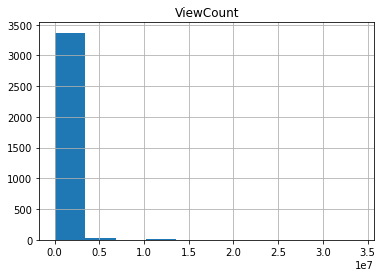

In [55]:
#Highly left skewed Y variable(ViewCount)
df.hist('ViewCount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000118F53708D0>]],
      dtype=object)

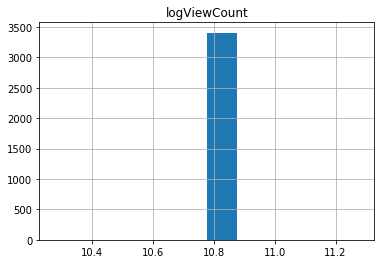

In [56]:
#Log transformation of ViewCount
from math import log
for i in df.ViewCount:
    if i != 0:
        df['logViewCount'] = np.log(i)

df.hist('logViewCount')


In [4]:
#Correlation Matrixs
df.drop(['CategoryID','FavouriteCount'], axis = 1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,CHViewCount,CHSubscriberCount,CHAge,CHVideoCount,Duration,Caption,ViewCount,LikeCount,DislikeCount,CommentCount,Comm_count_p2,Comm_count_ng2,Comm_count_n2,Comm_count_p7,Comm_count_ng7,Comm_count_n7
CHViewCount,1.0,0.98,0.38,0.18,0.028,0.076,0.29,0.43,0.25,0.36,-0.098,0.078,0.08,-0.016,0.18,0.19
CHSubscriberCount,0.98,1.0,0.31,0.21,0.0047,0.066,0.26,0.41,0.23,0.34,-0.092,0.072,0.071,-0.0015,0.18,0.19
CHAge,0.38,0.31,1.0,0.36,0.16,0.056,-0.028,0.0021,-0.026,-0.022,0.074,0.16,0.17,0.096,0.2,0.21
CHVideoCount,0.18,0.21,0.36,1.0,-0.0082,0.16,0.032,0.079,0.017,0.064,0.07,0.061,0.0074,0.092,0.087,0.044
Duration,0.028,0.0047,0.16,-0.0082,1.0,0.0035,0.026,0.039,0.028,0.039,-0.046,-0.011,-0.051,-0.045,-0.014,-0.051
Caption,0.076,0.066,0.056,0.16,0.0035,1.0,0.034,0.058,0.023,0.068,-0.047,0.013,-0.075,-0.033,0.015,-0.067
ViewCount,0.29,0.26,-0.028,0.032,0.026,0.034,1.0,0.86,0.88,0.86,-0.12,-0.07,-0.096,-0.13,-0.071,-0.097
LikeCount,0.43,0.41,0.0021,0.079,0.039,0.058,0.86,1.0,0.73,0.93,-0.15,-0.08,-0.11,-0.14,-0.07,-0.094
DislikeCount,0.25,0.23,-0.026,0.017,0.028,0.023,0.88,0.73,1.0,0.8,-0.11,-0.061,-0.087,-0.11,-0.057,-0.081
CommentCount,0.36,0.34,-0.022,0.064,0.039,0.068,0.86,0.93,0.8,1.0,-0.13,-0.074,-0.1,-0.13,-0.067,-0.095


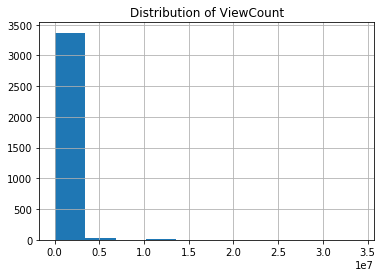

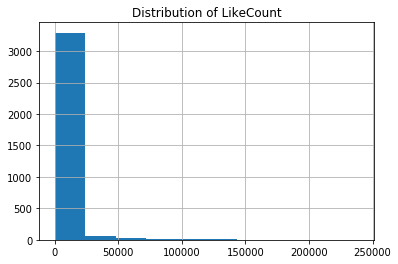

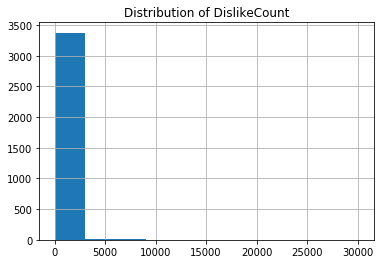

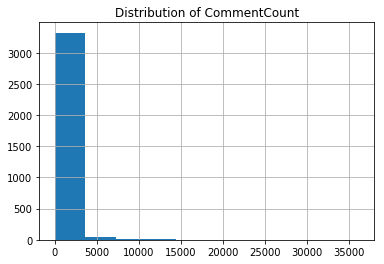

In [59]:
#ALl the Y variable distribution plot
df1 = ['ViewCount','LikeCount','DislikeCount','CommentCount']
for i in df1:
    df[i].hist()
    plt.title("Distribution of"+" "+i)
    plt.show()

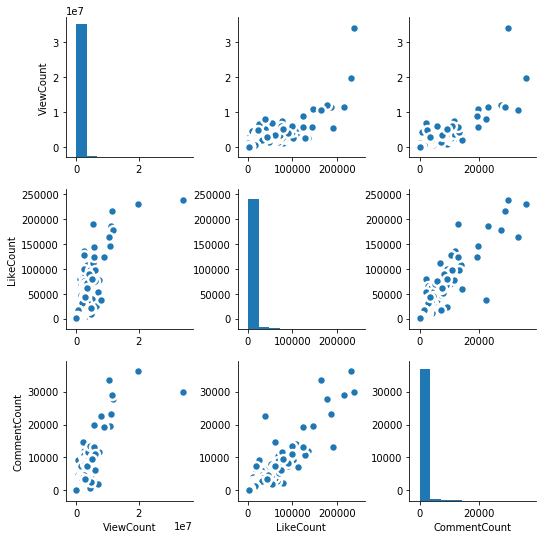

In [60]:
features = ['ViewCount','LikeCount','CommentCount']
data = df[features]
sns.pairplot(data, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

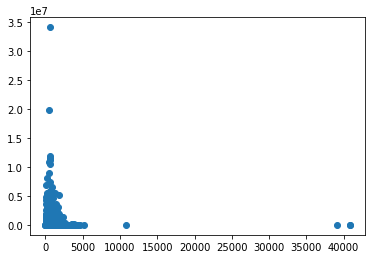

In [61]:
#Duration versus ViewCount
plt.scatter(df['Duration'],df['ViewCount'])

# Feature Extraction
Extracted number of days since the Published date to get the Age of the video

In [6]:
#To find the relation between views and age of the video
from datetime import datetime
from dateutil.parser import parse

def convert_to_days(dt):
    d=parse(dt)
    a=d.strftime('%m/%d/%Y')
    x=datetime.strptime(a, '%m/%d/%Y').date()
    y=datetime.now().date()
    days=((y-x).days)
    return days


In [7]:
AgeVideo = []
for i in df['PublishedDate']:
    AgeVideo.append(convert_to_days(str(i)))
    
df['AgeVideo'] = AgeVideo

(array([2315.,  442.,  212.,  183.,   93.,   57.,   37.,   29.,   18.,
          19.]),
 array([1.0000e+00, 2.0260e+02, 4.0420e+02, 6.0580e+02, 8.0740e+02,
        1.0090e+03, 1.2106e+03, 1.4122e+03, 1.6138e+03, 1.8154e+03,
        2.0170e+03]),
 <a list of 10 Patch objects>)

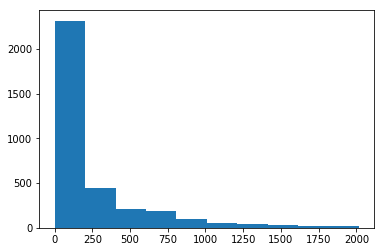

In [8]:
plt.hist(df['AgeVideo'])

# Eliminating outliers(Highly viral videos and recent 1 month videos)
View counts greater than 100K and age of the video less than 1 month 

In [9]:
dfnew = df[df['AgeVideo']<700]

In [10]:
dfnew = dfnew[dfnew['AgeVideo']>30]

In [11]:
dfnew = dfnew[dfnew['ViewCount']<100000]

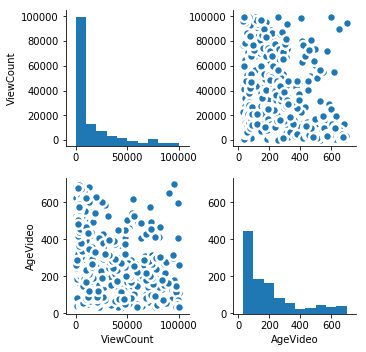

In [12]:
features = ['ViewCount','AgeVideo']
data = dfnew[features]
sns.pairplot(data, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

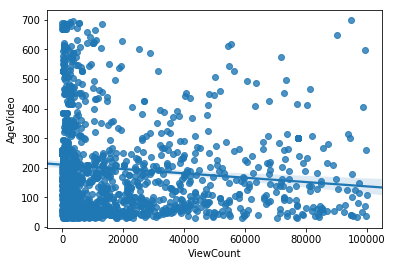

In [39]:
sns.regplot(dfnew['ViewCount'],dfnew['AgeVideo'])

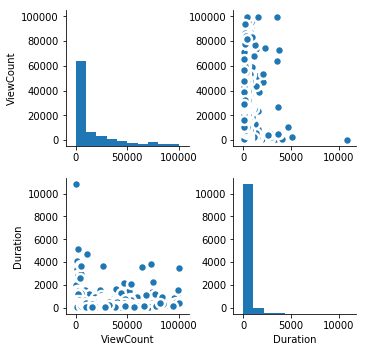

In [40]:
#Viewcount vs Duration of the video
features = ['ViewCount','Duration']
data = dfnew[features]
sns.pairplot(data, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

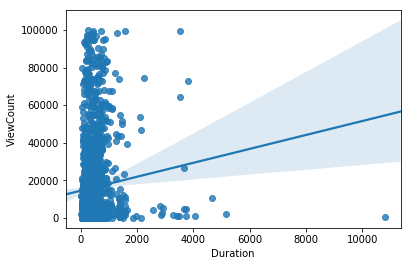

In [42]:
sns.regplot(dfnew['Duration'],dfnew['ViewCount'])

# Feature extraction
Created new dependent variable likes per view

In [13]:
#Created Like/View
df["Like/View"]=df['LikeCount'] / df['ViewCount'].astype(np.float)*100
dfnew["Like/View"]=dfnew['LikeCount'] / dfnew['ViewCount'].astype(np.float)*100

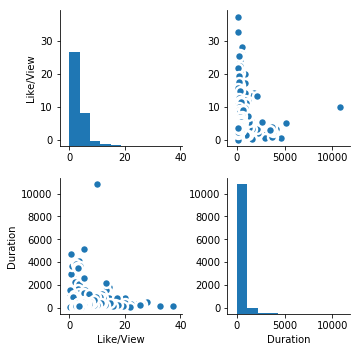

In [14]:
features = ['Like/View','Duration']
data = dfnew[features]
sns.pairplot(data, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

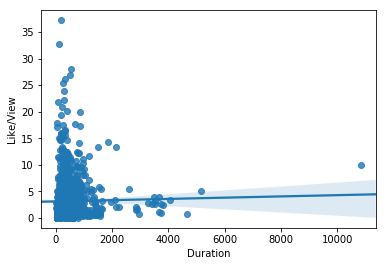

In [15]:
sns.regplot(dfnew['Duration'],dfnew['Like/View'])

# Insights
Most popular category when we search for "FOOD" on YouTube

In [45]:
dfnew.groupby(['CategoryID'])['VideoID'].count()

CategoryID
1      39
2       2
10     11
17     40
19    250
22    541
23     34
24    230
25      4
26    511
27     23
28      1
29     61
Name: VideoID, dtype: int64

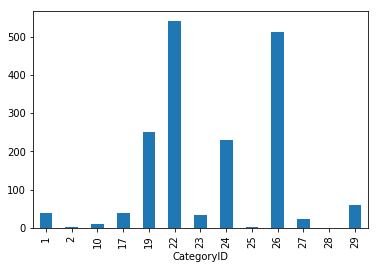

In [46]:
dfnew.groupby('CategoryID').VideoID.count().plot(kind="bar")
#22: People and blogs, 26: HowTo,19:Travel and events, 24: Entertainment

In [16]:
#Narrowing down further to find the most popular channels

In [52]:
dfnew1 = dfnew[dfnew['ViewCount']<80000]

In [55]:
dfnew1 = dfnew1[dfnew1['ViewCount']>50000]

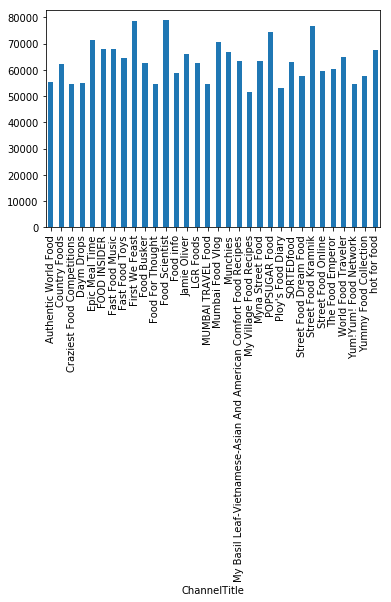

In [56]:
dfnew1.groupby('ChannelTitle').ViewCount.mean().plot(kind="bar")